In [11]:
%matplotlib inline

In [30]:
import nilearn 

In [40]:
nilearn.datasets.get_data_dirs?

In [6]:
haxby_dataset = nilearn.datasets.fetch_haxby()
fmri_filename = haxby_dataset.func[0]


Dataset created in /home/jflournoy/nilearn_data/haxby2001



Downloaded 2969 of 2969 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)
Downloaded 408 of 408 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)


Downloaded 291168628 of 291168628 bytes (100.0%,    0.0s remaining) ...done. (53 seconds, 0 min)
Extracting data from /home/jflournoy/nilearn_data/haxby2001/f33ff337e914bf7fded743c7107979f9/subj2-2010.01.14.tar.gz..... done.


In [7]:
print('First subject functional nifti images (4D) are at: %s' %
      fmri_filename)  # 4D data

First subject functional nifti images (4D) are at: /home/jflournoy/nilearn_data/haxby2001/subj2/bold.nii.gz


In [8]:
mask_filename = haxby_dataset.mask_vt[0]

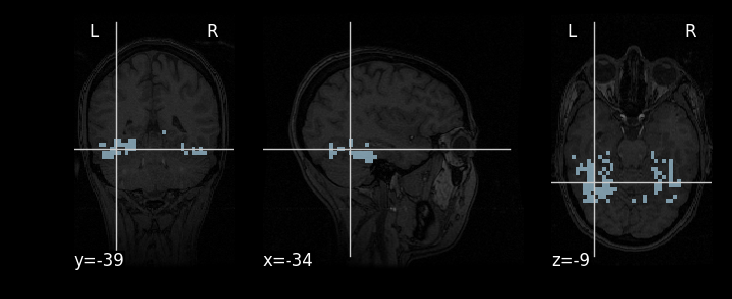

In [12]:
from nilearn import plotting
plotting.plot_roi(mask_filename, bg_img=haxby_dataset.anat[0],
                 cmap='Paired')

In [13]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_filename, standardize=True)

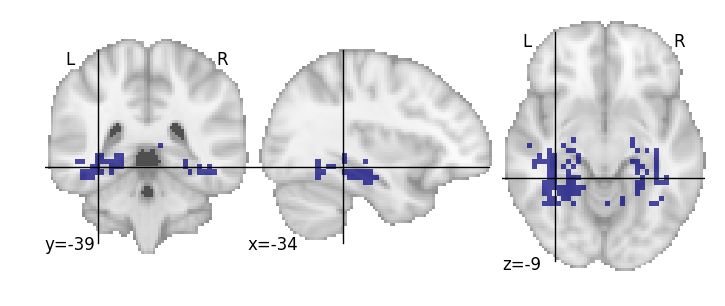

In [14]:
plotting.plot_roi(mask_filename)

In [15]:
fmri_masked = masker.fit_transform(fmri_filename)

In [16]:
print(fmri_masked.shape)

(1452, 464)


In [17]:
import numpy as np
# Load target information as string and give a numerical identifier to each
labels = np.recfromcsv(haxby_dataset.session_target[0], delimiter=" ")
print(labels)

[(b'rest', 0) (b'rest', 0) (b'rest', 0) ..., (b'rest', 11) (b'rest', 11)
 (b'rest', 11)]


In [18]:
target = labels['labels']
print(target)

[b'rest' b'rest' b'rest' ..., b'rest' b'rest' b'rest']


In [23]:
condition_mask = np.logical_or(target == b'face', target == b'cat')
print(condition_mask)

[False False False ..., False False False]


In [24]:
fmri_masked = fmri_masked[condition_mask]

In [25]:
print(fmri_masked.shape)

(216, 464)


In [26]:
target = target[condition_mask]
print(target.shape)

(216,)


In [27]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
print(svc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [28]:
svc.fit(fmri_masked, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
prediction = svc.predict(fmri_masked)
print(prediction)

[b'face' b'face' b'face' b'face' b'face' b'face' b'face' b'face' b'face'
 b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'face'
 b'face' b'face' b'face' b'face' b'face' b'face' b'face' b'face' b'cat'
 b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'face' b'face'
 b'face' b'face' b'face' b'face' b'face' b'face' b'face' b'cat' b'cat'
 b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat'
 b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'face' b'face' b'face' b'face'
 b'face' b'face' b'face' b'face' b'face' b'face' b'face' b'face' b'face'
 b'face' b'face' b'face' b'face' b'face' b'cat' b'cat' b'cat' b'cat' b'cat'
 b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat'
 b'cat' b'cat' b'cat' b'face' b'face' b'face' b'face' b'face' b'face'
 b'face' b'face' b'face' b'face' b'face' b'face' b'face' b'face' b'face'
 b'face' b'face' b'face' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat' b'cat'
 b'cat' b'cat' b'face' b'face' b'face' b'face' b'face' b